In [1]:
import nltk

stopword_list = nltk.corpus.stopwords.words('english')
stopword_list = stopword_list + ['mr', 'ms', 'come', 'go', 'get', 'tell', 'listen', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'zero', 'join', 'find', 'make', 'say', 'ask', 'tell', 'see', 'try', 'back', 'also']

In [2]:
import re

def keep_text_characters(text):
    filtered_tokens = []
    tokens = tokenize_text(text)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

In [3]:
from module.contractions import expand_contractions
from module.lemmatize import lemmatize_text

def normalize_corpus(corpus, lemmatize=True,
                     only_text_chars=False,
                     tokenize=False):
    normalized_corpus = []
    for text in corpus:
        text = html.unescape(text)
        text = expand_contractions(text)
    if lemmatize:
        text = lemmatize_text(text)
    else:
        text = text.lower()
    text = remove_special_characters(text)
    text = remove_stopwords(text)
    if only_text_chars:
        text = keep_text_characters(text)
    if tokenize:
        text = tokenize_text(text)
        normalized_corpus.append(text)
    else:
        normalized_corpus.append(text)
    return normalized_corpus

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def build_feature_matrix(documents, feature_type='frequency', ngram_range=(1,1), min_df=0.0, max_df=1.0):
    feature_type = feature_type.lower().strip()
    
    if feature_type == 'binary':
        vectorizer = CountVectorizer(binary=True, min_df=min_df,
                                     max_df=max_df, 
                                     ngram_range=ngram_range)
    elif feature_type == 'frequency':
        vectorizer = CountVectorizer(binary=False, min_df=min_df,
                                     max_df=max_df, ngram_range=ngram_range)
    elif feature_type == 'tfidf':
        vectorizer = TfidfVectorizer(min_df=min_df, max_df=max_df,
                                     ngram_range=ngram_range)
    else:
        raise Exception('Wrong feature type entered. Possible values: "binary", "frequency", "tfidf".')
        
    feature_matrix = vectorizer.fit_transform(documents).astype(float)
    
    return vectorizer, feature_matrix

# Text similarity

Analyzing text similarity:

- lexical similarity: observing the contents of the text documents with regard to syntax, structure and content and measuring their similarity based on these parameters
- semantic similarity: trying to find out the semantics, meaning and context of the documents and then trying to see how close they are to each other. Dependency grammars and entity recognition are handy tools that can help in this.

Lexical similarity is more straightforward to implement.

Two broad areas of text similarity:
- term similarity: measure similarity between individual tokens or words
- document similarity: measure similarity between entire text documents

## Analyzing term similarity

Word representations
- character vectorization
- bag of characters vectorization

In [5]:
import numpy as np

def vectorize_terms(terms):
    terms = [term.lower() for term in terms]
    terms = [np.array(list(term)) for term in terms]
    terms = [np.array([ord(char) for char in term])
             for term in terms]
    return terms

In [6]:
# Bag of character vectorization is similar to the bag of words model except here we compute the frequency of each character in the word.

def boc_term_vectors(word_list):
    word_list = [word.lower() for word in word_list]
    unique_chars = np.unique(
     np.hstack([list(word)
                for word in word_list]))
    word_list_term_counts = [{char: count for char, count in zip(*np.unique(list(word), return_counts=True))} for word in word_list]
    boc_vectors = [np.array([int(word_term_counts.get(char, 0))
                             for char in unique_chars])
                   for word_term_counts in word_list_term_counts]

    return list(unique_chars), boc_vectors

In [7]:
root = 'Believe'
term1 = 'beleive'
term2 = 'bargain'
term3 = 'Elephant'

terms = [root, term1, term2, term3]

In [8]:
# Character vectorization.
vec_root, vec_term1, vec_term2, vec_term3 = vectorize_terms(terms)
vec_root, vec_term1, vec_term2, vec_term3

(array([ 98, 101, 108, 105, 101, 118, 101]),
 array([ 98, 101, 108, 101, 105, 118, 101]),
 array([ 98,  97, 114, 103,  97, 105, 110]),
 array([101, 108, 101, 112, 104,  97, 110, 116]))

In [9]:
# Bag of characters vectorization.
features, (boc_root, boc_term1, boc_term2, boc_term3) = boc_term_vectors(terms)
print('Features')
features, (boc_root, boc_term1, boc_term2, boc_term3)

Features


(['a', 'b', 'e', 'g', 'h', 'i', 'l', 'n', 'p', 'r', 't', 'v'],
 (array([0, 1, 3, 0, 0, 1, 1, 0, 0, 0, 0, 1]),
  array([0, 1, 3, 0, 0, 1, 1, 0, 0, 0, 0, 1]),
  array([2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0]),
  array([1, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0])))

# Measuring similarity distance

- hamming distance
- manhattan distance
- euclidean distance
- levenshtein edit distance
- cosine distance and similarity

In [10]:
root_term = root
root_vector = vec_root
root_boc_vector = boc_root

terms = [term1, term2, term3]
vector_terms = [vec_term1, vec_term2, vec_term3]
boc_vector_terms = [boc_term1, boc_term2, boc_term3]

# Hamming distance

Distance measured between two strings under the assumptions that they are of equal length. Hamming distance is defined as the number of positions that have different characters or symbols between two strings of equal length.

In [11]:
def hamming_distance(u, v, norm=False):
    if u.shape != v.shape:
        raise ValueError('The vectors must have equal length')
    return (u != v).sum() if not norm else (u != v).mean()

In [12]:
# Compute hamming distance.
for term, vector_term in zip(terms, vector_terms):
    print(f'Hamming distance between root: {root_term} and term {term} is: {hamming_distance(root_vector, vector_term, norm=False)}')

Hamming distance between root: Believe and term beleive is: 2
Hamming distance between root: Believe and term bargain is: 6


ValueError: The vectors must have equal length

In [ ]:
# Compute normalized Hamming distance.
for term, vector_term in zip(terms, vector_terms):
    print(f'Hamming distance between root: {root_term} and term {term} is: {round(hamming_distance(root_vector, vector_term, norm=True), 2)}')

# Manhattan distance

Also known as _city block distance_, _L1 norm_, _taxicab metric_ and is defined as the distance between two points in a grid based on strictly horizontal or vertical paths instead of the diagonal distance conventionally calculated by the Euclidean distance metric.

In [ ]:
def manhattan_distance(u, v, norm=False):
    if u.shape != v.shape:
        raise ValueError('The vectors must have equal lengths.')
    return abs(u - v).sum() if not norm else abs(u - v).mean()

In [ ]:
# Compute Manhattan distance.
for term, vector_term in zip(terms, vector_terms):
    print(f'Manhattan distance between root: {root_term} and term {term} is: {manhattan_distance(root_vector, vector_term, norm=False)}')

In [ ]:
# Compute normalized Manhattan distance.
for term, vector_term in zip(terms, vector_terms):
    print(f'Manhattan distance between root: {root_term} and term {term} is: {round(manhattan_distance(root_vector, vector_term, norm=True), 2)}')

# Euclidean distance

Euclidean distance is also known as the _euclidean norm_, _l2 norm_, or _l2 distance_ and is defined as the shortest straight line distance between two points.

In [ ]:
def euclidean_distance(u, v):
    if u.shape != v.shape:
        raise ValueError('The vectors must have equal lengths.')
    distance = np.sqrt(np.sum(np.square(u - v)))
    return distance

In [ ]:
# Compute euclidean distance.
for term, vector_term in zip(terms, vector_terms):
    print('Euclidean distance between root {} and term {} is {}'.format(root_term,
                                                                        term,
                                                                        round(euclidean_distance(root_vector, vector_term), 2)))

# Levenshtein edit distance

Defined as the minimum number of edits needed in the form of additions, deletions or substitutions to change or convert one term to the other. The length of two terms need not be equal here.

In [ ]:
import copy
import pandas as pd

def levenshtein_edit_distance(u, v):
    # Convert to lower case.
    u = u.lower()
    v = v.lower()
    
    # Base cases.
    if u == v: return 0
    elif len(u) == 0: return len(v)
    elif len(v) == 0: return len(u)
    
    # Initialize edit distance matrix.
    edit_matrix = []
    
    # Initialize two distance matrices.
    du = [0] * (len(v) + 1)
    dv = [0] * (len(v) + 1)
    
    # du: the previous row of edit distances.
    for i in range(len(du)):
        du[i] = i
        
    # dv: the current row of edit distances.
    for i in range(len(u)):
        dv[0] = i + 1
        
        # Compute cost as per algorithm.
        for j in range(len(v)):
            cost = 0 if u[i] == v[j] else 1
            dv[j + 1] = min(dv[j] + 1, du[j + 1] + 1, du[j] + cost)
        
        # Assign dv to du for next iteration.
        for j in range(len(du)):
            du[j] = dv[j]
        
        # Copy dv to the edit matrix.
        edit_matrix.append(copy.copy(dv))
        
    # Compute the final edit distance and edit matrix.
    distance = dv[len(v)]
    edit_matrix = np.array(edit_matrix)
    edit_matrix = edit_matrix.T
    edit_matrix = edit_matrix[1:,]
    edit_matrix = pd.DataFrame(data=edit_matrix,
                               index=list(v),
                               columns=list(u))
    return distance, edit_matrix

In [ ]:
for term in terms:
    edit_d, edit_m = levenshtein_edit_distance(root_term, term)
    print(f'Computing distance between root: {root_term} and term: {term}')
    print(f'Levenshtein edit distance is {edit_d}')
    print('The complete edit distance matrix is depicted below')
    print(edit_m)
    print('-' * 30)

# Cosine distance and similarity

The cosine distance is a metric that can be actually derived from the cosine similarity and vice versa. Considering we have two terms such that they are represented in their vectorized forms, Cosine similarity gives us the measure of the cosine of the angle between them when they are represented as non-zero positive vectors in an inner product space.

Term vectors having similar orientation will have scores closer to 1 (cos 0) indicating the vectors are very close to each other in the same direction (near to zero degree angle between them). Term vectors having a similarity score close to 0 (cos 90) indicate unrelated terms with a near orthogonal angle between them. Term vectors with a similarity score close to -1 (cos 180) indicate terms that are completely oppositely oriented to each other.

In [ ]:
def cosine_distance(u, v):
    distance = 1.0 - (np.dot(u, v) / 
                      (np.sqrt(sum(np.square(u))) * np.sqrt(sum(np.square(v))))
                     )
    return distance

In [ ]:
for term, boc_term in zip(terms, boc_vector_terms):
    print('Analyzing similarity between root: {} and term: {}'.format(root_term, term))
    distance = round(cosine_distance(root_boc_vector, boc_term), 2)
    similarity = 1 - distance
    print(f'Cosine distance is {distance}')
    print(f'Cosine similarity is {similarity}')
    print('-' * 40)

# Analyzing document similarity

Metrics:
- cosine similarity
- hellinger-bhattacharya distance
- okapi bm25 ranking


In [13]:
from module.utils import normalize_corpus, build_feature_matrix
import numpy as np

In [14]:
# Load the toy corpus index.
toy_corpus = [
    'The sky is blue',
    'The sky is blue and beautiful',
    'Look at the bright blue sky!',
    'Python is a great programming language',
    'Python and Java are popular Programming languages',
    'Among Programming languages, both Python and Java are the most used in Analytics',
    'The fox is quicker than the lazy dog',
    'The dog is smarter than the fox',
    'The dog, fox and cat are good friends'
]

In [15]:
# Load the docs for which we will be measuring similarities.
query_docs = ['The fox is definitely smarter than the dog',
              'Java is a static typed programming language unlike Python',
              'I love to relax under the beautiful blue sky!']

In [21]:
# Normalize and extract features from the toy corpus.
norm_corpus = normalize_corpus(toy_corpus, lemmatize=True)
tfidf_vectorizer, tfidf_features = build_feature_matrix(norm_corpus, 
                                                        feature_type='tfidf')

In [22]:
# Normalize and extract features from the query corpys.
norm_query_docs = normalize_corpus(query_docs, lemmatize=True)
query_docs_tfidf = tfidf_vectorizer.transform(norm_query_docs)

# Cosine similarity.

In [23]:
def compute_cosine_similarity(doc_features, corpus_features,
                              top_n=3):
    # Get document vectors.
    doc_features = doc_features.toarray()[0]
    corpus_features = corpus_features.toarray()
    
    # Compute similarities.
    similarity = np.dot(doc_features,
                        corpus_features.T)
    
    # Get doc with highest similarity scores.
    top_docs = similarity.argsort()[::-1][:top_n]
    top_docs_with_score = [(index, round(similarity[index], 3))
                           for index in top_docs]
    return top_docs_with_score

In [24]:
# Get Cosine similarity results for our example documents.
print('Document similarity analysis using cosine similarity')
print('=' * 60)

for index, doc in enumerate(query_docs):
    doc_tfidf = query_docs_tfidf[index]
    top_similar_docs = compute_cosine_similarity(doc_tfidf, 
                                                 tfidf_features,
                                                 top_n=2)
    
    print(f'Document {index+1}: {doc}')
    print(f'Top {len(top_similar_docs)} similar docs:')
    print('-' * 40)
    for doc_index, sim_score in top_similar_docs:
        print(f'Doc num: {doc_index+1} Similarity score: {sim_score}\nDoc: {toy_corpus[doc_index]}')
        print('-' * 40)
    print()

Document similarity analysis using cosine similarity
Document 1: The fox is definitely smarter than the dog
Top 2 similar docs:
----------------------------------------
Doc num: 8 Similarity score: 1.0
Doc: The dog is smarter than the fox
----------------------------------------
Doc num: 7 Similarity score: 0.426
Doc: The fox is quicker than the lazy dog
----------------------------------------

Document 2: Java is a static typed programming language unlike Python
Top 2 similar docs:
----------------------------------------
Doc num: 5 Similarity score: 0.837
Doc: Python and Java are popular Programming languages
----------------------------------------
Doc num: 6 Similarity score: 0.661
Doc: Among Programming languages, both Python and Java are the most used in Analytics
----------------------------------------

Document 3: I love to relax under the beautiful blue sky!
Top 2 similar docs:
----------------------------------------
Doc num: 2 Similarity score: 1.0
Doc: The sky is blue and

# Hellinger-Bhattacharya Distance

Aka Hellinger Distance or the Bhattacharya distance, is used to measure the similarity between two discrete or continuous probability distributions.

In [25]:
def compute_hellinger_bhattacharya_distance(doc_features, corpus_features, top_n=3):
    # Get document vectors.
    doc_features = doc_features.toarray()[0]
    corpus_features = corpus_features.toarray()
    
    # Compute hb distances.
    distance = np.hstack(
     np.sqrt(0.5 * np.sum(np.square(np.sqrt(doc_features) - np.sqrt(corpus_features)),
                          axis=1)))
    
    # Get docs with the lowest distance scores.
    top_docs = distance.argsort()[:top_n]
    top_docs_with_scores = [(index, round(distance[index], 3))
                             for index in top_docs]
    return top_docs_with_scores

In [26]:
# Get Hellinger-Bhattacharya distance based similarities for our example documents.
print('Document similarity analysis using Hellinger-Bhattacharya distance:')
print('=' * 60)
for index, doc in enumerate(query_docs):
    doc_tfidf = query_docs_tfidf[index]
    top_similar_docs = compute_hellinger_bhattacharya_distance(doc_tfidf, 
                                                               tfidf_features,
                                                               top_n=2)
    print(f'Document {index+1}: {doc}')
    print(f'Top {len(top_similar_docs)} similar docs')
    print('-' * 40)
    for doc_index, sim_score in top_similar_docs:
        print(f'Doc num: {doc_index+1}: Distance score: {sim_score}\nDoc: {toy_corpus[doc_index]}')
        print('-' * 40)
    print()

Document similarity analysis using Hellinger-Bhattacharya distance:
Document 1: The fox is definitely smarter than the dog
Top 2 similar docs
----------------------------------------
Doc num: 8: Distance score: 0.0
Doc: The dog is smarter than the fox
----------------------------------------
Doc num: 7: Distance score: 0.96
Doc: The fox is quicker than the lazy dog
----------------------------------------

Document 2: Java is a static typed programming language unlike Python
Top 2 similar docs
----------------------------------------
Doc num: 5: Distance score: 0.53
Doc: Python and Java are popular Programming languages
----------------------------------------
Doc num: 4: Distance score: 0.766
Doc: Python is a great programming language
----------------------------------------

Document 3: I love to relax under the beautiful blue sky!
Top 2 similar docs
----------------------------------------
Doc num: 2: Distance score: 0.0
Doc: The sky is blue and beautiful
--------------------------

# Okapi BM25 ranking

BM stands for best matching. The Okapi BM25 can be formally defined as a document ranking and retrieval function based on a Bag-of-Words based model for retrieving relevant documents based on a user input query.

In [27]:
import scipy.sparse as sp

def compute_corpus_term_idfs(corpus_features, norm_corpus):
    dfs = np.diff(sp.csc_matrix(corpus_features, copy=True).indptr)
    dfs = 1 + dfs # To smoothen the idf later.
    total_docs = 1 + len(norm_corpus)
    idfs = 1.0 + np.log(float(total_docs) / dfs)
    return idfs

In [28]:
def compute_bm25_similarity(doc_features, corpus_features,
                            corpus_doc_lengths, 
                            avg_doc_length,
                            term_idfs, k1=1.5, b=0.75, top_n=3):
    # Get corpus bag of words features.
    corpus_features = corpus_features.toarray()
    
    # Convert query document features to binary features.
    # This is to keep a note of which terms exist per document.
    doc_features = doc_features.toarray()[0]
    doc_features[doc_features >= 1] = 1
    
    # Compute the document idf scores for present terms.
    doc_idfs = doc_features * term_idfs
    
    # Compute the numerator expression in BM25 equation.
    numerator_coeff = corpus_features * (k1 + 1)
    numerator = np.multiply(doc_idfs, numerator_coeff)
    
    # Compute denominator expression in BM25 equation.
    denominator_coeff = k1 * (1 - b + (b * (corpus_doc_lengths / avg_doc_length)))
    denominator_coeff = np.vstack(denominator_coeff)
    denominator = corpus_features + denominator_coeff
    
    # Compute the BM25 score combining the above equations.
    bm25_scores = np.sum(np.divide(numerator,
                                   denominator),
                         axis=1)
    
    # Get top n relevant docs with highest BM25 score.
    top_docs = bm25_scores.argsort()[::-1][:top_n]
    top_docs_with_score = [(index, round(bm25_scores[index], 3))
                           for index in top_docs]
    return top_docs_with_score

In [29]:
# Build bag of words based features first.
vectorizer, corpus_features = build_feature_matrix(norm_corpus, feature_type='frequency')
query_docs_features = vectorizer.transform(norm_query_docs)

# Get average document length of the corpus (avgdl)
docs_length = [len(doc.split()) for doc in norm_corpus]
avg_dl = np.average(docs_length)

# Get the corpus term idfs.
corpus_term_idfs = compute_corpus_term_idfs(corpus_features, norm_corpus)

# Analyze document similarity using BM25 framework.
print('Document similarity analysis using BM25')
print('=' * 60)

for index, doc in enumerate(query_docs):
    doc_features = query_docs_features[index]
    top_similar_docs = compute_bm25_similarity(doc_features, 
                                               corpus_features,
                                               docs_length,
                                               avg_dl,
                                               corpus_term_idfs,
                                               k1=1.5, b=0.75,
                                               top_n=2)
    print(f'Document {index+1}: {doc}')
    print(f'Top {len(top_similar_docs)} similar docs:')
    print('-' * 40)
    for doc_index, sim_score in top_similar_docs:
        print(f'Doc num: {doc_index+1} BM25 Score: {sim_score}\nDoc: {toy_corpus[doc_index]}')
        print('-' * 40)
    print()

Document similarity analysis using BM25
Document 1: The fox is definitely smarter than the dog
Top 2 similar docs:
----------------------------------------
Doc num: 8 BM25 Score: 7.334
Doc: The dog is smarter than the fox
----------------------------------------
Doc num: 7 BM25 Score: 3.88
Doc: The fox is quicker than the lazy dog
----------------------------------------

Document 2: Java is a static typed programming language unlike Python
Top 2 similar docs:
----------------------------------------
Doc num: 5 BM25 Score: 7.248
Doc: Python and Java are popular Programming languages
----------------------------------------
Doc num: 6 BM25 Score: 6.042
Doc: Among Programming languages, both Python and Java are the most used in Analytics
----------------------------------------

Document 3: I love to relax under the beautiful blue sky!
Top 2 similar docs:
----------------------------------------
Doc num: 2 BM25 Score: 7.334
Doc: The sky is blue and beautiful
-----------------------------

# Document clustering

- document classification needs pre-labeled training data to build a model and then categorize documents
- document clustering uses unsupervised ML algorithms to group the documents into various clusters.

Clustering algorithms:
- hierarchical clustering models
- centroid-based clustering models
- distribution-based clustering models
- density-based clustering models

Algorithms:
- k-means clustering
- affinity propagation
- ward's agglomerative hierarchical clustering

In [30]:
import pandas as pd
import numpy as np

In [31]:
# Load movie data.
movie_data = pd.read_csv('movie_data.csv')

# View movie data.
movie_data.head()

,Title,Synopsis
0,The Godfather,"In late summer 1945, guests are gathered for t..."
1,The Shawshank Redemption,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,Schindler's List,The relocation of Polish Jews from surrounding...
3,Raging Bull,"The film opens in 1964, where an older and fat..."
4,Casablanca,"In the early years of World War II, December 1..."


In [32]:
movie_titles = movie_data['Title']
movie_synopses = movie_data['Synopsis']
print('Movie:', movie_titles[0])
print('Movie Synopsis:', movie_synopses[0][:1000])

Movie: The Godfather
Movie Synopsis: In late summer 1945, guests are gathered for the wedding reception of Don Vito Corleone's daughter Connie (Talia Shire) and Carlo Rizzi (Gianni Russo). Vito (Marlon Brando), the head of the Corleone Mafia family, is known to friends and associates as "Godfather." He and Tom Hagen (Robert Duvall), the Corleone family lawyer, are hearing requests for favors because, according to Italian tradition, "no Sicilian can refuse a request on his daughter's wedding day." One of the men who asks the Don for a favor is Amerigo Bonasera, a successful mortician and acquaintance of the Don, whose daughter was brutally beaten by two young men because she refused their advances; the men received minimal punishment. The Don is disappointed in Bonasera, who'd avoided most contact with the Don due to Corleone's nefarious business dealings. The Don's wife is godmother to Bonasera's shamed daughter, a relationship the Don uses to extract new loyalty from the undertaker. T

In [48]:
# %load_ext autoreload
%reload_ext autoreload

from module.utils import normalize_corpus, build_feature_matrix

# Normalize corpus.
norm_movie_synopses = normalize_corpus(movie_synopses,
                                       lemmatize=True,
                                       only_text_chars=True)

In [49]:
# Extract tf-idf features.
vectorizer, feature_matrix = build_feature_matrix(norm_movie_synopses,
                                                  feature_type='tfidf',
                                                  min_df=0.24, max_df=0.85,
                                                  ngram_range=(1, 2))

# View number of features.
print(feature_matrix.shape)

(100, 314)


In [50]:
# Get feature names.
feature_names = vectorizer.get_feature_names()
feature_names[:20]

['able',
 'accept',
 'across',
 'act',
 'agree',
 'alive',
 'allow',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'another',
 'anything',
 'apartment',
 'appear',
 'approach',
 'arm',
 'army']

# K-means Clustering

A centroid-based clustering model that tries to cluster data into groups or clusters of equal variance. The criteris or measure that this algorithm tries to minimize is _inertia_, also known as within-cluster sum-of-squares. 

In [53]:
from sklearn.cluster import KMeans

# Define the k-means clustering function.
def k_means(feature_matrix, num_clusters=5):
    km = KMeans(n_clusters=num_clusters,
                max_iter=10_000)
    km.fit(feature_matrix)
    clusters = km.labels_
    return km, clusters

In [54]:
# Set k = 5, lets say we want 5 clusters from the 100 movies.
num_clusters = 5

# Get clusters and assigned the cluster labels to the movies.
km_obj, clusters = k_means(feature_matrix=feature_matrix,
                           num_clusters=num_clusters)
movie_data['Cluster'] = clusters

In [65]:
from collections import Counter

# Get the total number of movies per cluster.
c = Counter(clusters)
c.items()

dict_items([(0, 35), (4, 36), (1, 17), (3, 7), (2, 5)])

In [66]:
def get_cluster_data(clustering_obj={}, movie_data=[],
                     feature_names=[], num_clusters=3,
                     topn_features=10):
    cluster_details = {}
    
    # Get cluster centroids.
    ordered_centroids = clustering_obj.cluster_centers_.argsort()[:, ::-1]
    
    # Get key features for each cluster.
    # Get movie belonging to each cluster.
    for cluster_num in range(num_clusters):
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster_num'] = cluster_num
        key_features = [feature_names[index] for index
                        in ordered_centroids[cluster_num, :topn_features]]
        cluster_details[cluster_num]['key_features'] = key_features
        movies = movie_data[movie_data['Cluster'] == cluster_num]['Title'].values.tolist()
        cluster_details[cluster_num]['movies'] = movies
        
    return cluster_details

In [67]:
def print_cluster_data(cluster_data):
    # Print cluster details.
    for cluster_num, cluster_details in cluster_data.items():
        print(f'Cluster {cluster_num} details:')
        print('-' * 20)
        print(f"Key features: {cluster_details['key_features']}")
        print('Movies in this cluster:')
        print(', '.join(cluster_details['movies']))
        print('=' * 40)

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import cosine_similarity
import random
from matplotlib.font_manager import FontProperties

def plot_clusters(num_clusters, feature_matrix,
                  cluster_data,
                  movie_data,
                  plot_size=(16, 8)):

    # Generate random color for clusters.
    def generate_random_color():
        color = '#%06x' % random.randint(0, 0xFFFFFF)
        return color

    # Define markers for clusters.
    markers = ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd']
    
    # Build cosine distance matrix.
    cosine_distance = 1 - cosine_similarity(feature_matrix)
    
    # Dimensionality reduction using MDS.
    mds = MDS(n_components=2, dissimilarity='precomputed',
              random_state=1)
    
    # Get coordinates of clusters in a new low-dimensional space.
    plot_positions = mds.fit_transform(cosine_distance)
    x_pos, y_pos = plot_positions[:, 0], plot_positions[:, 1]
    
    # Build cluster plotting data.
    cluster_color_map = {}
    cluster_name_map = {}
    
    for cluster_num, cluster_details in cluster_data.items():
        # Assign cluster features to unique label.
        cluster_color_map[cluster_num] = generate_random_color()
        cluster_name_map[cluster_num] = ', '.join(cluster_details['key_features'][:5]).strip()
    
    # Map each unique cluster label with its coordinates and movies.
    cluster_plot_frame = pd.DataFrame({'x': x_pos,
                                       'y': y_pos,
                                       'label': movie_data['Cluster'].values.tolist(),
                                       'title': movie_data['Title'].values.tolist()})
    
    grouped_plot_frame = cluster_plot_frame.groupby('label')
    
    # Set plot figure size and axes.
    fig, ax = plt.subplots(figsize=plot_size)
    ax.margins(0.05)
    
    # Plot each cluster using co-ordinates and movie titles.
    for cluster_num, cluster_frame in grouped_plot_frame:
        marker = markers[cluster_num] if cluster_num < len(markers) else np.random.choice(markers, size=1)[0]
        ax.plot(cluster_frame['x'], cluster_frame['y'], marker=marker, linestyle='', ms=12,
                label=cluster_name_map[cluster_num],
                color=cluster_color_map[cluster_num], mec='none')
        ax.set_aspect('auto')
        ax.tick_params(axis='x',
                       which='both',
                       bottom='off',
                       top='off',
                       labelbottom='off')
        ax.tick_params(axis='y',
                       which='both',
                       left='off',
                       top='off',
                       labelleft='off')
    fontP = FontProperties()
    fontP.set_size('small')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.01), fancybox=True, 
              shadow=True,
              ncol=5,
              numpoints=1,
              prop=fontP)
    
    # Add labels as the film titles.
    for index in range(len(cluster_plot_frame)):
        ax.text(cluster_plot_frame.iloc[index]['x'], 
                cluster_plot_frame.iloc[index]['y'],
                cluster_plot_frame.iloc[index]['title'], size=8)
        
    # Show the plot.
    plt.show()

In [76]:
# Get clustering analysis data.
cluster_data = get_cluster_data(km_obj, movie_data=movie_data,
                                feature_names=feature_names,
                                num_clusters=num_clusters,
                                topn_features=5)

# Print clustering analysis results.
print_cluster_data(cluster_data)

Cluster 0 details:
--------------------
Key features: ['army', 'kill', 'soldier', 'find', 'war']
Movies in this cluster:
The Godfather, Schindler's List, Raging Bull, Casablanca, Gone with the Wind, Lawrence of Arabia, The Godfather: Part II, Forrest Gump, Star Wars, The Silence of the Lambs, The Bridge on the River Kwai, Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb, Apocalypse Now, Gandhi, The Lord of the Rings: The Return of the King, Gladiator, From Here to Eternity, Saving Private Ryan, Raiders of the Lost Ark, The Best Years of Our Lives, Ben-Hur, Doctor Zhivago, Patton, The Good, the Bad and the Ugly, Butch Cassidy and the Sundance Kid, Platoon, Dances with Wolves, The Pianist, The Deer Hunter, All Quiet on the Western Front, Mr. Smith Goes to Washington, The Grapes of Wrath, Network, Stagecoach, Mutiny on the Bounty
Cluster 1 details:
--------------------
Key features: ['love', 'family', 'go', 'make', 'film']
Movies in this cluster:
Citizen Kane, The Soun

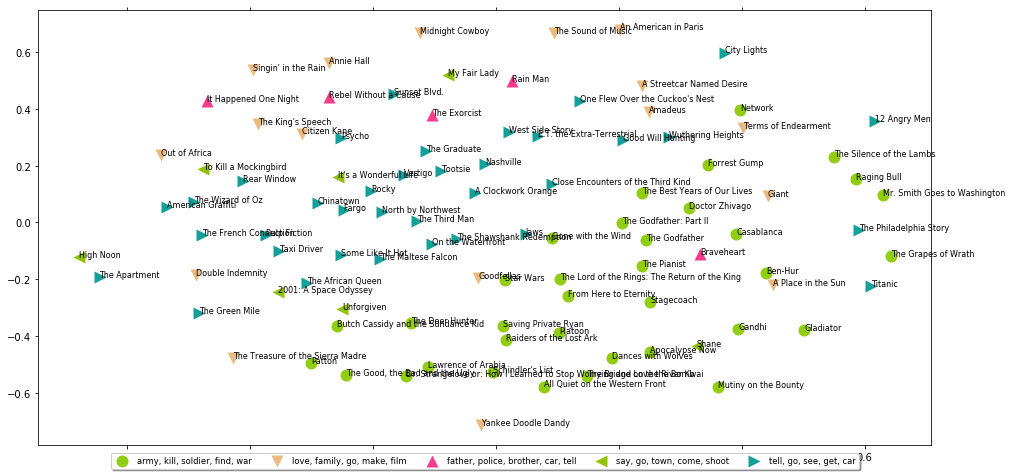

In [77]:
# Visualize the clusters.
plot_clusters(num_clusters=num_clusters,
              feature_matrix=feature_matrix,
              cluster_data=cluster_data,
              movie_data=movie_data,
              plot_size=(16, 8))

# Affinity Propagation

The k-means algorithm has a drawback that the user has to predefine the number of clusters. Some popular methods to determine the optimum k:
    - elbow method
    - sillhoutte coefficient

Affinity propagation algorithm is based on the concept of message passing among the various data points to be clustered, and no pre-assumption is needed about the number of possible clusters.
AP creates these clusters from the data points by passing messages between pairs of data points until convergence is achieved.

In [78]:
from sklearn.cluster import AffinityPropagation

def affinity_propagation(feature_matrix):
    sim = feature_matrix * feature_matrix.T
    sim = sim.todense()
    ap = AffinityPropagation()
    ap.fit(sim)
    clusters = ap.labels_
    return ap, clusters

In [79]:
# Get clusters using affinity propagation.
ap_obj, clusters = affinity_propagation(feature_matrix=feature_matrix)
movie_data['Cluster'] = clusters

# Get the total number of movies per cluster.
c = Counter(clusters)
c.items()

dict_items([(0, 6), (1, 20), (3, 5), (10, 6), (2, 11), (6, 10), (14, 8), (9, 4), (7, 4), (8, 4), (5, 7), (11, 4), (4, 4), (12, 4), (13, 3)])

In [80]:
# Get total clusters.
total_clusters = len(c)
print(f'Total clusters: {total_clusters}')

Total clusters: 15


In [81]:
# Get clustering analysis data.
cluster_data = get_cluster_data(clustering_obj=ap_obj, movie_data=movie_data,
                                feature_names=feature_names,
                                num_clusters=total_clusters,
                                topn_features=5)

In [82]:
# Print clustering analysis results.
print_cluster_data(cluster_data)

Cluster 0 details:
--------------------
Key features: ['able', 'although', 'continue', 'drop', 'catch']
Movies in this cluster:
The Godfather, The Godfather: Part II, Doctor Zhivago, The Pianist, Goodfellas, Giant
Cluster 1 details:
--------------------
Key features: ['anything', 'feel', 'fight', 'drink', 'face']
Movies in this cluster:
The Shawshank Redemption, Vertigo, On the Waterfront, West Side Story, Chinatown, It's a Wonderful Life, Some Like It Hot, Rocky, The French Connection, Tootsie, Fargo, Nashville, The Graduate, Pulp Fiction, The Maltese Falcon, A Clockwork Orange, Taxi Driver, Rear Window, The Third Man, North by Northwest
Cluster 2 details:
--------------------
Key features: ['around', 'escape', 'fight', 'feel', 'always']
Movies in this cluster:
One Flew Over the Cuckoo's Nest, The Wizard of Oz, Psycho, E.T. the Extra-Terrestrial, 2001: A Space Odyssey, My Fair Lady, Ben-Hur, Butch Cassidy and the Sundance Kid, The Exorcist, Close Encounters of the Third Kind, The Afri

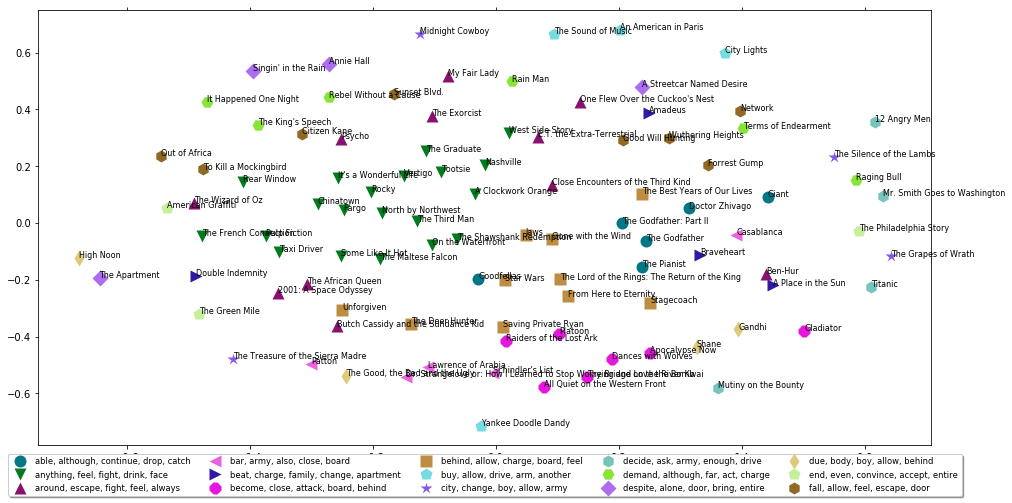

In [83]:
# Visualize the clusters.
plot_clusters(num_clusters=num_clusters,
              feature_matrix=feature_matrix,
              cluster_data=cluster_data,
              movie_data=movie_data,
              plot_size=(16, 8))

# Ward's Agglomerative Hierachical Clustering

In [86]:
from scipy.cluster.hierarchy import ward, dendrogram

def ward_hierachical_clustering(feature_matrix):
    cosine_distance = 1 - cosine_similarity(feature_matrix)
    linkage_matrix = ward(cosine_distance)
    return linkage_matrix

In [87]:
def plot_hierarchical_clusters(linkage_matrix, movie_data, figure_size=(8, 12)):
    # Set size.
    fig, ax = plt.subplots(figsize=figure_size)
    movie_titles = movie_data['Title'].values.tolist()
    
    # Plot dendogram.
    ax = dendogram(linkage_matrix, orientation='left', labels=movie_titles)
    plt.tick_params(axis='x',
                    which='both',
                    bottom='off',
                    top='off',
                    labelbottom='off')
    plt.tight_layout()
    plt.savefig('ward_hierarchical_clusters.png', dpi=200)

In [ ]:
# Build ward's linkage matrix.
linkage_matrix = ward_hierarchical